In [1]:
import pandas as pd

data=pd.read_csv('mcdonalds.csv')
data = {
    'yummy': ['No', 'Yes', 'No'],
    'convenient': ['Yes', 'Yes', 'Yes'],
    'spicy': ['No', 'No', 'Yes'],
    'fattening': ['Yes', 'Yes', 'Yes'],
    'greasy': ['No', 'Yes', 'Yes'],
    'fast': ['Yes', 'Yes', 'Yes'],
    'cheap': ['Yes', 'Yes', 'No'],
    'tasty': ['No', 'Yes', 'Yes'],
    'expensive': ['Yes', 'Yes', 'Yes'],
    'healthy': ['No', 'No', 'Yes'],
    'disgusting': ['No', 'No', 'No'],
    'Like': [-3, 2, 1],
    'Age': [61, 51, 62],
    'VisitFrequency': ['Every three months', 'Every three months', 'Every three months'],
    'Gender': ['Female', 'Female', 'Female']
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Display column names
print(mcdonalds.columns)

# Display dimensions
print(mcdonalds.shape)

# Display the first 3 rows
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(3, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting  Like  Age      VisitFrequency  Gender  
0         No    -3   61  Every three months  Female  
1         No     2   51  Every three months  Female  
2         No     1   62  Every three months  Female  


In [2]:
import numpy as np

# Extract the first 11 columns and convert to a matrix
MD_x = mcdonalds.iloc[:, 0:11].to_numpy()

# Convert "Yes" to 1 and anything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round them to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)

# Display the column means
print(dict(zip(mcdonalds.columns[0:11], col_means)))


{'yummy': 0.33, 'convenient': 1.0, 'spicy': 0.33, 'fattening': 1.0, 'greasy': 0.67, 'fast': 1.0, 'cheap': 0.67, 'tasty': 0.67, 'expensive': 1.0, 'healthy': 0.33, 'disgusting': 0.0}


In [3]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA on the binary matrix MD_x
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summarize the PCA result
# Standard deviations of each principal component
std_devs = np.sqrt(pca.explained_variance_)

# Proportion of variance explained by each component
prop_var = np.round(pca.explained_variance_ratio_, 4)

# Cumulative proportion of variance explained
cum_var = np.round(np.cumsum(prop_var), 4)

# Print summary similar to R output
summary_data = {
    "Standard deviation": std_devs,
    "Proportion of Variance": prop_var,
    "Cumulative Proportion": cum_var
}

# Display the summary for the first few components
pca_summary = pd.DataFrame(summary_data)
print(pca_summary)


   Standard deviation  Proportion of Variance  Cumulative Proportion
0        1.135198e+00                  0.6443                 0.6443
1        8.434008e-01                  0.3557                 1.0000
2        1.200248e-16                  0.0000                 1.0000


In [5]:
# Print the standard deviations (singular values)
print("Standard deviations (1, .., p):")
print(np.round(std_devs, 1))

# Adjust the number of principal components based on the actual result
num_components = pca.components_.shape[0]

# Print the rotation (loadings) matrix
print(f"\nRotation (n x k) = (11 x {num_components}):")
components = pd.DataFrame(np.round(pca.components_.T, 2), 
                          columns=[f'PC{i+1}' for i in range(num_components)],
                          index=mcdonalds.columns[:11])
print(components)



Standard deviations (1, .., p):
[1.1 0.8 0. ]

Rotation (n x k) = (11 x 3):
             PC1   PC2   PC3
yummy      -0.13  0.66  0.70
convenient -0.00 -0.00 -0.27
spicy       0.49 -0.18  0.31
fattening  -0.00 -0.00  0.00
greasy      0.36  0.48 -0.35
fast       -0.00 -0.00  0.00
cheap      -0.49  0.18 -0.07
tasty       0.36  0.48 -0.35
expensive  -0.00 -0.00  0.00
healthy     0.49 -0.18  0.31
disgusting -0.00 -0.00  0.00


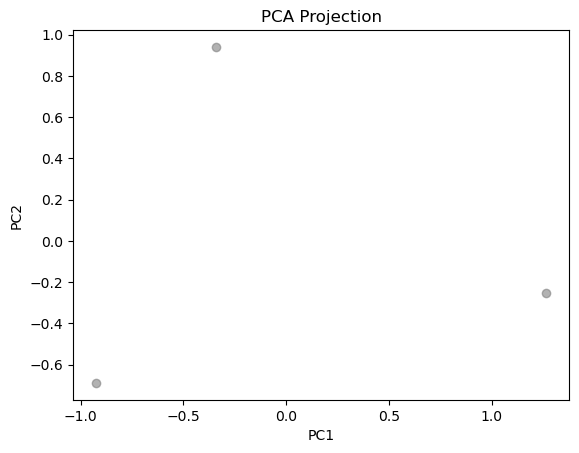

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA (assuming MD_x has already been created as a binary matrix)
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot the first two principal components
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)

# Label the axes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display the plot
plt.title('PCA Projection')
plt.show()


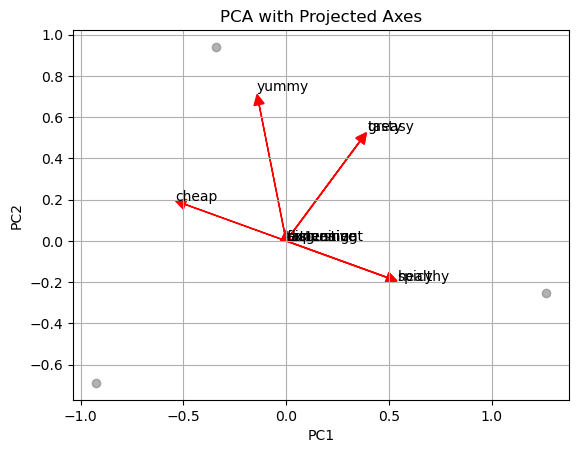

In [7]:
# Get the loadings (rotation matrix)
loadings = pca.components_.T

# Plot the original PCA projection again
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)

# Add projections of the axes (the loadings)
for i, var in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='red', head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='black')

# Label the axes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display the plot
plt.title('PCA with Projected Axes')
plt.grid()
plt.show()


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
# compute the pairwise distances between the columns of MD_x
D = np.transpose(MD_x)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [21.25, 21.25, 77.5, 77.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.0, 1.1840949166102643, 1.1840949166102643, 1.0],
  [1.0, 1.3779186362859523, 1.3779186362859523, 1.1840949166102643]],
 'ivl': ['6', '8', '5', '1', '3', '0', '4', '7', '10', '2', '9'],
 'leaves': [6, 8, 5, 1, 3, 0, 4, 7, 10, 2, 9],
 'color_list': ['C1', 'C2', 'C2', 'C0', 'C3', 'C0', 'C4', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C1',
  'C1',
  'C2',
  'C2',
  'C2',
  'C0',
  'C3',
  'C3',
  'C0',
  'C4',
  'C4']}

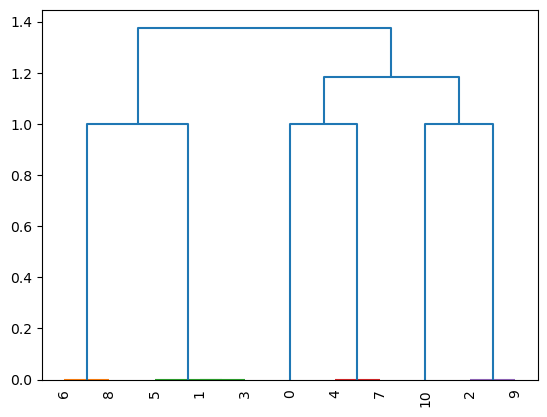

In [23]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 10, show_contracted = True)

In [24]:
# get the coordinates of the data projected onto the first two principal components
proj_data = pca.fit_transform(x)[:, :2]

# plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

NameError: name 'x' is not defined